In [191]:
import torch
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer

import pandas as pd
import numpy as np
import math

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from matplotlib import pyplot as plt

In [192]:
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_dir = ['fonts']
for font in fm.findSystemFonts(font_dir):
    fm.fontManager.addfont(font)
    
rcParams['font.family'] = 'D2Coding'

In [193]:
pretrained_model_path = "sbert/training_klue_sts_klue-roberta-base-2022-08-17_23-27-13"
model = SentenceTransformer(pretrained_model_path)

In [194]:
tokenizer = AutoTokenizer.from_pretrained('sbert/training_klue_sts_klue-roberta-base-2022-08-17_23-27-13')

In [195]:
vocab = list(tokenizer.vocab.keys())
vocab = [token for token in vocab if not 'unused' in token]
vocab_embs = model.encode(vocab)

In [196]:
top_scored_business_news = pd.read_csv('results/인공지능_문화체육관광부_클라썸_v4_test/top_scored_business_news.csv')
top_orgs_and_their_news = pd.read_csv('results/인공지능_문화체육관광부_클라썸_v4_test/top_orgs_and_their_news.csv')

In [197]:
query = top_scored_business_news
news_contents = top_orgs_and_their_news
query_embedding = model.encode(query.content)
news_embeddings = model.encode(news_contents.content)

In [213]:
labels = pd.concat([top_scored_business_news, top_orgs_and_their_news]).target.to_list()
scores = top_orgs_and_their_news.score.to_list()
scores = [max(scores) + 0.025] + top_orgs_and_their_news.score.to_list()

pca = PCA(n_components=1)
embs = np.concatenate((query_embedding, news_embeddings), axis=0)
pca_results = pca.fit_transform(embs)

xys = [[score, pca_result[0]] for score, pca_result in zip(scores, pca_results)]

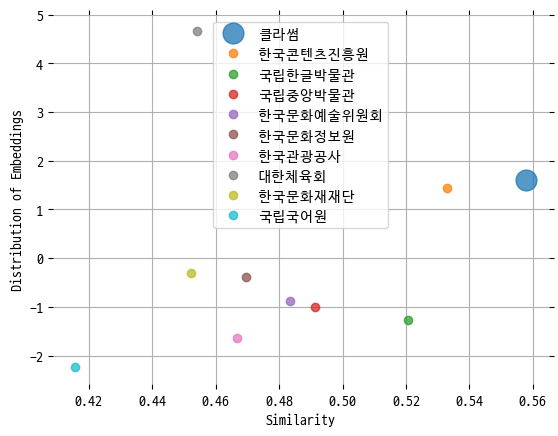

In [219]:
ax = plt.subplot(111)

idx = 0
for xy, label in zip(xys, labels):
    if idx == 0:
        ax.plot(xy[0], xy[1], 'o', alpha=0.75, label=label, markersize=15)
    else:
        ax.plot(xy[0], xy[1], 'o', alpha=0.75, label=label)
    idx += 1

plt.xlabel('Similarity')
plt.ylabel('Distribution of Embeddings')

leg = plt.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.title('')

# hide axis ticks
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
        labelbottom="on", left="off", right="off", labelleft="on")

# remove axis spines
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)    

plt.legend(loc='best')
plt.tight_layout
plt.grid()
plt.show()

In [158]:
# def plot_xys(xys):
#     ax = plt.subplot(111)

#     idx = 0
#     for pca, label in zip(xys, labels):
#         if idx == 0:
#             ax.plot(pca[0], pca[1], '*', alpha=0.75, label=label, markersize=15)
#         else:
#             ax.plot(pca[0], pca[1], 'o', alpha=0.75, label=label)
#         idx += 1
    
#     plt.xlabel('PC1')
#     plt.ylabel('PC2')

#     leg = plt.legend(loc='upper right', fancybox=True)
#     leg.get_frame().set_alpha(0.5)
#     plt.title('')

#     # hide axis ticks
#     plt.tick_params(axis="both", which="both", bottom="off", top="off",  
#             labelbottom="on", left="off", right="off", labelleft="on")

#     # remove axis spines
#     ax.spines["top"].set_visible(False)  
#     ax.spines["right"].set_visible(False)
#     ax.spines["bottom"].set_visible(False)
#     ax.spines["left"].set_visible(False)    

#     plt.tight_layout
#     plt.grid()
#     plt.show()

In [172]:
# plot_xys(xys)